# <center>K-Means for Segmentation as Clustering</center>

In [1]:
import numpy as np
import cv2 as cv
import random
import matplotlib.pyplot as plt

In [2]:
def myKmeans(data, k):
    """
    Your implementation of k-means algorithm
    :param data: list of data points to cluster
    :param k: number of clusters
    :return: centers and list of indices that store the cluster index for each data point
    """
    centers = np.zeros((k, data.shape[1]))
    index = np.zeros(data.shape[0], dtype=int)
    clusters = [[] for i in range(k)]

    # random centers initialization
    centers = data[random.sample(range(data.shape[0]), k)]

    convergence = False
    while not convergence:
        convergence = True
        # clear clusters on each new iteration
        for i in range(k):
            clusters[i] = []
        
        # for each point calculate the distance to each cluster
        distances = np.linalg.norm(data[:, np.newaxis] - centers, axis=2)
        # assign each point to the cluster of closest center
        index = np.argmin(distances, axis=-1)
        for i in range(data.shape[0]):
            clusters[index[i]].append(data[i])

        # update clusters' centers
        for i in range(k):
            if len(clusters[i]) != 0:
                updated_center = (np.rint(np.mean(clusters[i], axis=0))).astype(int)
                if not np.array_equal(updated_center, centers[i]):
                    convergence = False
                centers[i] = updated_center

    return index, np.clip(centers, 0, 255).astype(np.uint8)

Intensity K-means segmentation


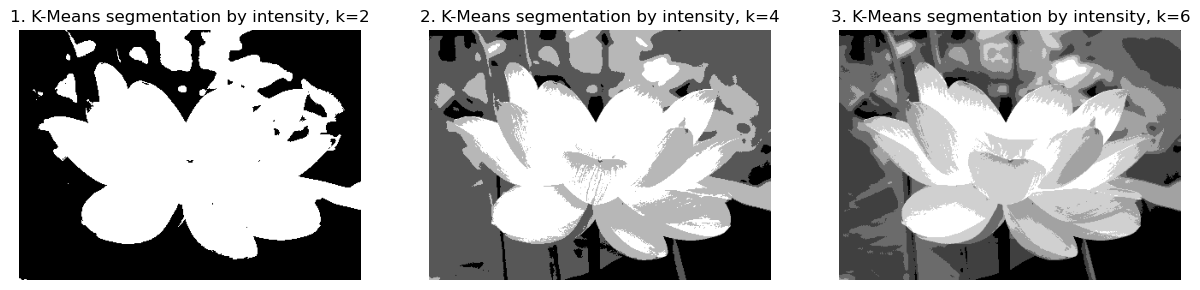

Color K-means segmentation


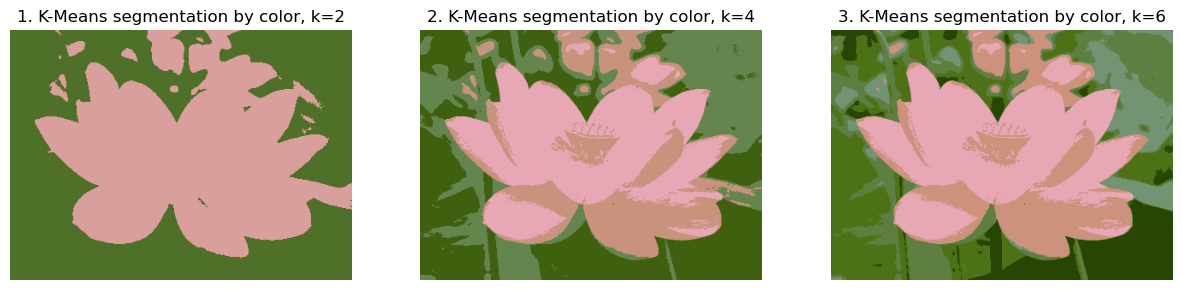

Intensity and scale K-means segmentation


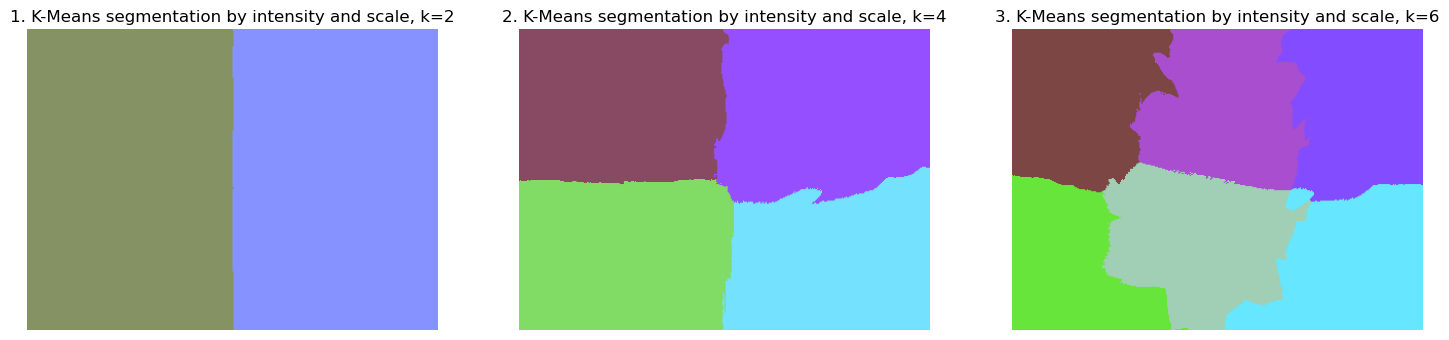

HSV K-means segmentation


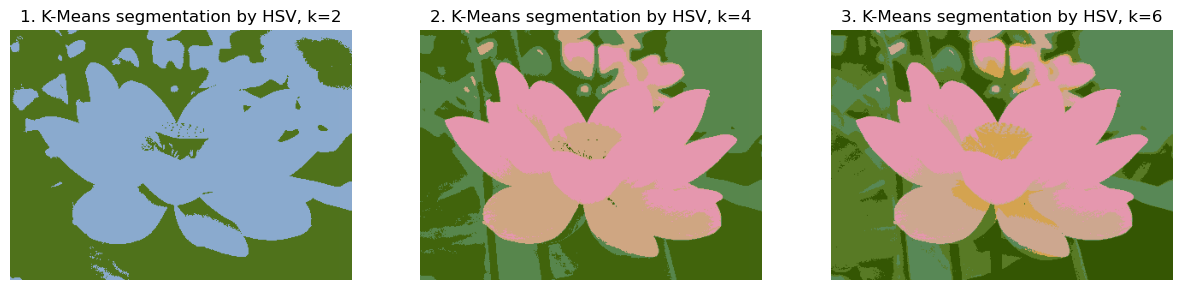

In [5]:
cluster_sizes = [2,4,6]
clusters_total = len(cluster_sizes)
    
def read_flower_image():
    return cv.imread('./images/flower.png')

def task_a():
    print("Intensity K-means segmentation")
    img = read_flower_image()
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    img_gray_list = img_gray.reshape((-1, 1)).astype(np.int32)
    fig = plt.figure(figsize=(15,6))
    
    for i, k in enumerate(cluster_sizes):
        index, centers = myKmeans(img_gray_list, k)
        # map the result to image
        result = centers[index]
        plot_image = result.reshape((img_gray.shape))
        # plot clustered image
        fig.add_subplot(1, clusters_total, i+1)
        plt.imshow(plot_image, cmap='gray')
        plt.title(f"{i+1}. K-Means segmentation by intensity, k={k}")
        plt.axis('off')
    plt.show()

def task_b():
    print("Color K-means segmentation")
    img = read_flower_image()
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    img_rgb_list = img_rgb.reshape((-1, 3)).astype(np.int32)
    fig = plt.figure(figsize=(15,6))
    
    for i, k in enumerate(cluster_sizes):
        index, centers = myKmeans(img_rgb_list, k)
        # map the result to image
        result = centers[index]
        plot_image = result.reshape((img_rgb.shape))
        # plot clustered image
        fig.add_subplot(1, clusters_total, i+1)
        plt.imshow(plot_image)
        plt.title(f"{i+1}. K-Means segmentation by color, k={k}")
        plt.axis('off')
    plt.show()

def task_c():
    print("Intensity and scale K-means segmentation")
    img = read_flower_image()
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    img_list = img_gray.reshape((-1, 1))
    pos = np.indices(img_gray.shape).transpose(1, 2, 0)
    pos_list = pos.reshape(-1, 2)
    scaled_img_list = np.concatenate((img_list, pos_list), axis=1).astype(np.int32)
    fig = plt.figure(figsize=(18,6))
    
    for i, k in enumerate(cluster_sizes):
        index, centers = myKmeans(scaled_img_list, k)
        # map the result to image
        result = centers[index]
        plot_image = result.reshape((img.shape))
        # plot clustered image
        fig.add_subplot(1, clusters_total, i+1)
        plt.imshow(plot_image)
        plt.title(f"{i+1}. K-Means segmentation by intensity and scale, k={k}")
        plt.axis('off')
    plt.show()

def task_d():
    print("HSV K-means segmentation")
    img = read_flower_image()
    img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
    img_hsv_list = img_hsv.reshape((-1, 3)).astype(np.int32)
    fig = plt.figure(figsize=(15,6))
    
    for i, k in enumerate(cluster_sizes):
        index, centers = myKmeans(img_hsv_list, k)
        # map the result to image
        result = centers[index]
        plot_image = result.reshape((img_hsv.shape))
        plot_image = cv.cvtColor(plot_image, cv.COLOR_HSV2RGB)
        # plot clustered image
        fig.add_subplot(1, clusters_total, i+1)
        plt.imshow(plot_image)
        plt.title(f"{i+1}. K-Means segmentation by HSV, k={k}")
        plt.axis('off')
    plt.show()

task_a()
task_b()
task_c()
task_d()